## Riksdagens dokument KU-anmälningar

* Denna [Jupyter Notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksdagens%20dokument%20KU-anm%C3%A4lningar.ipynb) 
  * [SFS](https://github.com/salgo60/open-data-examples/blob/master/Riksdagens%20dokument%20SFS.ipynb)
  * [Motioner]()
* [Skapa sökfråga](http://data.riksdagen.se/dokumentlista/)  561 träffar
* [Dokumenttyper](http://data.riksdagen.se/sv/koder/?typ=doktyp&utformat=json)


In [13]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
urlbase ="http://data.riksdagen.se/dokumentlista/?sok=&doktyp=ku-anm&utformat=json&start="

dftot = pd.DataFrame()
for i in range(1,11813):
    url = urlbase + str(i)
    if ((i-1) % 10) == 0:
       print('*', end='', flush=True)
    r = http.request('GET', url)
    data = json.loads(r.data)
    dftot = dftot.append(pd.DataFrame(data["dokumentlista"]["dokument"]),sort=False)
dftot.head()

***

KeyError: 'dokument'

In [20]:
dftot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 0
Data columns (total 57 columns):
traff                561 non-null object
domain               561 non-null object
database             561 non-null object
datum                561 non-null object
id                   561 non-null object
rdrest               0 non-null object
slutdatum            0 non-null object
rddata               0 non-null object
plats                0 non-null object
klockslag            0 non-null object
publicerad           561 non-null object
systemdatum          561 non-null object
undertitel           559 non-null object
kalla                560 non-null object
kall_id              0 non-null object
dok_id               561 non-null object
dokumentformat       0 non-null object
dokument_url_text    561 non-null object
dokument_url_html    561 non-null object
inlamnad             0 non-null object
motionstid           0 non-null object
tilldelat            0 non-null object
lang           

In [14]:
dftot[['nummer','titel','publicerad','beslutad','datum','summary']] 


,nummer,titel,publicerad,beslutad,datum,summary
0,39,Hemställan om granskning av utrikesminister An...,2020-06-24,None,2020-06-23,MARKUS WIECHEL\n Riksdagsledamot SD 2020-06-23...
1,37,Begäran om granskning av Morgan Johanssons han...,2020-06-18,None,2020-06-18,Morgan Johanssons hantering av så kallade komp...
2,38,Begäran om granskning av regeringens motstridi...,2020-06-18,None,2020-06-17,MARIA STOCKHAUS\n Riksdagsledamot M 2020-06-17...
3,36,Begäran om granskning av regeringens och Isabe...,2020-06-12,None,2020-06-11,JESSICA ROSENCRANTZ\n Riksdagsledamot M 2020-0...
4,35,Granskning av statsrådet Anna Ekströms uttalan...,2020-06-12,None,2020-06-10,PATRICK RESLOW\n Riksdagsledamot SD 2020-06-10...
...,...,...,...,...,...,...
16,5,Näringsminister Björn Rosengrens hantering av ...,1900-01-01,None,2002-09-06,Näringsminister Björn Rosengrens hantering av
17,4,Upphandlingen av Helikopter NH90,1900-01-01,None,2002-09-02,Upphandlingen av Helikopter
18,3,Regeringens agerande när det gäller Hundskolan...,1900-01-01,None,2002-07-11,Regeringens agerande när det gäller Hundskolan i
19,2,Näringsministern Björn Rosengrens uttalande om...,1900-01-01,None,2002-07-02,Näringsministern Björn Rosengrens uttalande om...


In [15]:
dftot.publicerad.unique()

array(['2020-06-24', '2020-06-18', '2020-06-12', '2020-03-11',
       '2020-02-03', '2020-01-31', '2020-01-29', '2020-01-27',
       '2020-01-17', '2020-01-16', '2020-01-15', '2020-01-09',
       '2019-12-19', '2019-12-13', '2019-12-11', '2019-11-29',
       '2019-11-27', '2019-11-08', '2019-10-25', '2019-10-15',
       '2019-10-10', '2019-10-09', '2019-07-09', '2019-07-11',
       '2019-07-08', '2019-06-19', '2019-04-17', '2019-03-29',
       '2019-03-08', '2019-03-07', '2019-03-05', '2019-02-04',
       '2019-02-05', '2019-02-01', '2019-01-24', '2018-12-21',
       '2018-09-19', '2018-08-20', '2018-05-28', '2018-05-25',
       '2018-05-08', '2018-03-15', '2018-03-12', '2018-02-23',
       '2018-02-20', '2018-02-19', '2018-01-30', '2018-01-29',
       '2018-02-01', '2018-01-24', '2018-01-17', '2018-01-11',
       '2017-12-20', '2017-12-19', '2017-12-05', '2017-10-30',
       '2017-10-19', '2017-10-10', '2017-09-22', '2017-09-07',
       '2017-09-01', '2017-08-14', '2017-08-10', '2017-

In [16]:
dftot.publicerad.value_counts()

1900-01-01             293
2018-01-30               4
2020-06-12               4
2017-08-10               3
2018-01-24               3
                      ... 
2019-06-19               1
2016-08-22 14:03:19      1
2019-07-08               1
2011-11-18 16:32:11      1
2017-01-27 15:06:57      1
Name: publicerad, Length: 248, dtype: int64

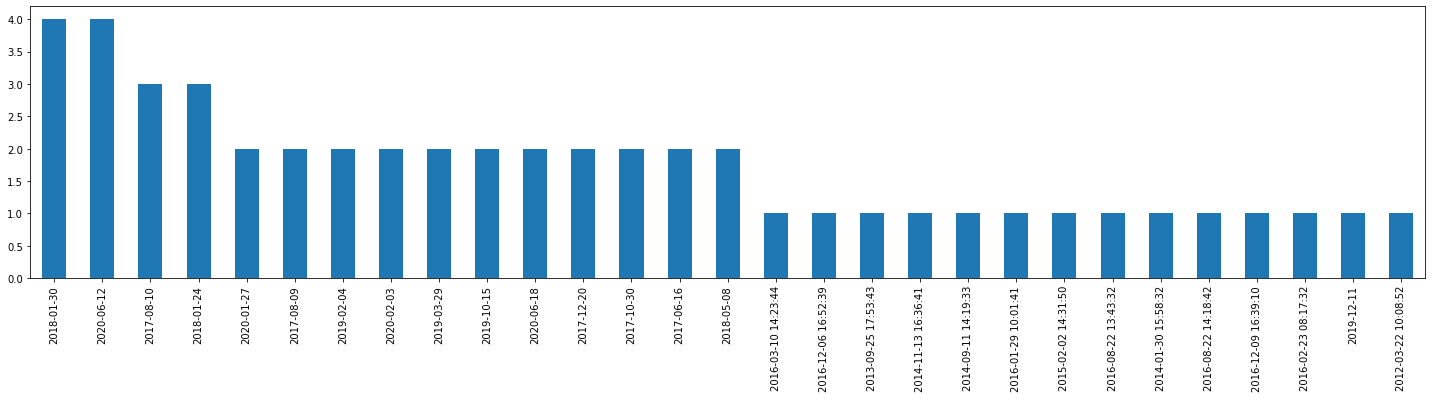

In [17]:
%matplotlib inline  
import matplotlib.pyplot as plt   
plot = dftot.publicerad.value_counts()[1:30].plot.bar(y='counts', figsize=(25, 5)) 
plt.show()

In [18]:
organCount = dftot.organ.value_counts() 
organCount

KU     560
JuU      1
Name: organ, dtype: int64

In [19]:
dftot.undertitel.value_counts()[1:50]

Ulrika Karlsson (M)                                        10
Ingvar Svensson (kd)                                        8
Carl B Hamilton (fp)                                        7
Henrik von Sydow (m)                                        7
Tobias Krantz (fp)                                          5
Peter Hultqvist (s)                                         5
Sten Tolgfors (m)                                           5
Sven-Erik Österberg (s)                                     4
Karin Pilsäter och Mauricio Rojas (fp)                      4
Sofia Arkelsten (M)                                         4
Peter Hultqvist (S)                                         4
Leif Pagrotsky (s)                                          4
Stefan Attefall (kd)                                        4
Thomas Bodström (s)                                         4
KARIN ENSTRÖM  (M)                                          4
Hans Hoff (s)                                               4
Eva Flyb